# Part 1 :  Data Scrapping from Amazon
****
****

### Step 1: Import required libraries..
***

In [1]:
from bs4 import BeautifulSoup as bs
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 2: Url link  & page requests.. 
***

In [2]:
# provide review page link so that we can fetch the data.
url = 'https://www.amazon.in/boAt-BassHeads-100-Headphones-Black/product-reviews/B071Z8M4KX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

# set page request..
page = requests.get(url)


### Step 3: Parse the html data using beautiful soup
***

In [3]:
soup = bs(page.content, 'html.parser')
# print(soup.prettify())
# the prettify function will print data in the satndard format so that it will readable

### Step 4: Fetch the data required from diff html tags from url resource page/by page inspect method
***

#### 4.1 Fetching User names..(Privacy Policy So not shown in final code..)
***

In [4]:
# FOR REVIEW ID

# a = soup.find_all('div', class_='a-section celwidget')
# for i in a:
#     print(i.get('id')[16:20])

In [5]:
# @hidden_cell

# do right click on user name & inspect. observe where the user name is provided.
#..in this case user name is in 'span' tag. But html page contains huge no. of span tags so we take check
#...in which class all user name span tag is associated. 

users = soup.find_all('span', class_='a-profile-name')

# since it is list, crossverifying first name from the given list..
users[0]


<span class="a-profile-name">Neshway</span>

#### 4.2 Fetching Review titles...
***

In [6]:
# extracting only text from users list..

user_names = []
for i in range(0, len(users)):
    user_names.append(users[i].get_text())

![](https://github.com/ShrikantUppin/NLP/blob/main/amazon_review.png?raw=true)

In [7]:
#user_names

In [8]:
titles = soup.find_all('a', class_='review-title-content')

# since it is list, crossverifying revie title from the given list..
titles[0]

<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R270ZWETAMQXXT?ASIN=B071Z8M4KX">
<span>Worth the money</span>
</a>

In [9]:
# extracting only review text from titltles list..

review_title = []
for i in range(0, len(titles)):
    review_title.append(titles[i].get_text())
review_title 

['\nWorth the money\n',
 '\nMust watch this detailed 👉 REVIEW ☺️\n',
 '\nVFM Product\n',
 '\nThe repair/replacement process is hassle free and easy!\n',
 '\nGood but lack bass...\n',
 '\nQuality sound\n',
 '\nBest for the price\n',
 '\nExcellent after sales services and value for money\n',
 '\nBroken headset\n',
 '\nGood\n']

In [10]:
# We can obeserve that \n in above review_titles.So need to clean it..

for i in range(len(review_title)):
    review_title[i] = review_title[i].lstrip('\n')
    review_title[i] = review_title[i].rstrip('\n')
    
review_title

['Worth the money',
 'Must watch this detailed 👉 REVIEW ☺️',
 'VFM Product',
 'The repair/replacement process is hassle free and easy!',
 'Good but lack bass...',
 'Quality sound',
 'Best for the price',
 'Excellent after sales services and value for money',
 'Broken headset',
 'Good']

#### 4.3 Fetching Review ratings i.e. reviews star numbers..
***

In [11]:
ratings = soup.find_all('i', class_='review-rating')

# since it is list, crossverifying first rating from the given list..
ratings[0]

<i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">5.0 out of 5 stars</span></i>

In [12]:
# extracting only review text from ratings list..

rating_numbers = []
for i in range(0, len(ratings)):
    rating_numbers.append(ratings[i].get_text())
    
rating_numbers

['5.0 out of 5 stars',
 '3.0 out of 5 stars',
 '5.0 out of 5 stars',
 '3.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '3.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '4.0 out of 5 stars']

In [13]:
# putting only float type rating in rating_number list..

for i in range(0, len(rating_numbers)):
    rating_numbers[i] = float(rating_numbers[i][0:3]) # Used lsit slicing +string slicing..

In [14]:
rating_numbers

[5.0, 3.0, 5.0, 3.0, 5.0, 5.0, 3.0, 4.0, 4.0, 5.0, 1.0, 4.0]

#### 4.4 Fetching Review text
***

![](https://github.com/ShrikantUppin/NLP/blob/main/revie_text.png?raw=true)

In [15]:
# if we observe the review span tag is not having any class name...
#.. we will take the upper span & will access without using class name..
# so to access any tag data without using class name.. the dict method is used in beautiful soup 
#........................................................................................as below.


review_para = soup.find_all('span', {"data-hook":"review-body"})

# since it is list, crossverifying first review from the given list..
review_para[0]

<span class="a-size-base review-text review-text-content" data-hook="review-body">
<span>
  One of the best pair of earphone for the price<br/><br/>1} Sound quality is amazing for the price 😍<br/>2} Built quality is good but not the best but  for the budget price I can say its good ⚡<br/>3} Headphone jack is not gold plated ⚠️<br/>4} I have been using this earphone from past more than a year and have replaced it once under warranty which was super easy hassel free🎶<br/>5} I have used many other brand earphones such as JBL, Sony, Sennheiser, RHA, Boultaudio and recently Infinity and I am not a professional but have experience of many earphones so I can say this is the best sounding in budget and very comfortable in shape to use for longer duration 💯💥<br/><br/>I can definitely recommend this earphones must buy in budget segment 🔝🔝✅🔥🔥
</span>
</span>

In [16]:
# extracting only review para from ratings list..

review_detail = []
for i in range(0, len(review_para)):
    review_detail.append(review_para[i].get_text())
    
review_detail[0]

'\n\n  One of the best pair of earphone for the price1} Sound quality is amazing for the price 😍2} Built quality is good but not the best but  for the budget price I can say its good ⚡3} Headphone jack is not gold plated ⚠️4} I have been using this earphone from past more than a year and have replaced it once under warranty which was super easy hassel free🎶5} I have used many other brand earphones such as JBL, Sony, Sennheiser, RHA, Boultaudio and recently Infinity and I am not a professional but have experience of many earphones so I can say this is the best sounding in budget and very comfortable in shape to use for longer duration 💯💥I can definitely recommend this earphones must buy in budget segment 🔝🔝✅🔥🔥\n\n'

In [17]:
# We can obeserve that \n in above review_details .So need to clean it..

for i in range(len(review_detail)):
    review_detail[i] = review_detail[i].lstrip('\n')
    review_detail[i] = review_detail[i].rstrip('\n')
    
review_detail[0]

'  One of the best pair of earphone for the price1} Sound quality is amazing for the price 😍2} Built quality is good but not the best but  for the budget price I can say its good ⚡3} Headphone jack is not gold plated ⚠️4} I have been using this earphone from past more than a year and have replaced it once under warranty which was super easy hassel free🎶5} I have used many other brand earphones such as JBL, Sony, Sennheiser, RHA, Boultaudio and recently Infinity and I am not a professional but have experience of many earphones so I can say this is the best sounding in budget and very comfortable in shape to use for longer duration 💯💥I can definitely recommend this earphones must buy in budget segment 🔝🔝✅🔥🔥'

### Step 5: Creating pandas Dataframe
***

In [18]:
# since pandas dataframe requires equal length arrays/lists. Need to check list lengths first.
import numpy as np
import pandas as pd 

lists = [user_names, review_title, rating_numbers, review_detail]

length = [] 
for i in range(len(lists)):
    length.append(len(lists[i]))
    if len(lists[i])>max(length):
        lists[i] = lists[i]
    else:
        difference = max(length)-len(lists[i])
        lists[i].extend([np.nan for i in range(difference)])


In [19]:
amazon_reviews = pd.DataFrame({'User_Name':user_names, 'Review_title':review_title,\
                              'Ratings':rating_numbers, 'Review':review_detail})

In [20]:
amazon_reviews.head(1)

,User_Name,Review_title,Ratings,Review
0,Neshway,Worth the money,5.0,One of the best pair of earphone for the pri...


 If you observe clearly some users have not submitted review title, reviews..
 
 so if we directly create dataframe using data fetched lists. it will mislead to the anlysis.
 
 So uptill now this is the introductory part how to scrap data using Beautiful Soup.
 
 let's build neat model...which will fetch review from multiple pages and arrange it correctly..!

![](https://github.com/ShrikantUppin/NLP/blob/main/crosscheck1.png?raw=true)

![](https://github.com/ShrikantUppin/NLP/blob/main/crosscheck2.png?raw=true)

Wrongly assigned in dataframe.. observe review in review column 

# Part 2 : Writing a clean code..
***

In [29]:
def review_fetch(pages):

    # import libraries required...
    import numpy as np
    import pandas as pd 
    import requests 
    from bs4 import BeautifulSoup as bs4

            
    Review_id = []
    Review_title = []
    Rating_stars = []
    Review_para = []
    
    
    for i in range(pages):
         # provide review page link so that we can fetch the data.
         # global link    
        link = 'https://www.amazon.in/boAt-BassHeads-100-Headphones-Black/product-reviews/B071Z8M4KX/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={}'.format(i)
        headers = {
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
        }
        # set page request..
        source = requests.get(link)
        Soup = bs(source.content, 'html.parser')
            
        all = Soup.find_all('div', class_='a-section celwidget')
        
        for i in all:
            a = i.get('id')
            Review_id.append(a[16:20])

        for item in all:
                rating = item.find('i', class_='review-rating').text
                title = item.find('a', {"data-hook":"review-title"}).text
                review_text = item.find('span', {"data-hook":"review-body"}).text
                
                Rating_stars.append(rating)
                Review_title.append(title)
                Review_para.append(review_text)
    
    global review_df
    review_df = pd.DataFrame({'Review_ID':Review_id, 'Ratings':Rating_stars,\
                              'Review_title':Review_title, 'Review':Review_para})
    
    return review_df.head(1)
           

In [30]:
review_fetch(500)

,Review_ID,Ratings,Review_title,Review
0,R270,5.0 out of 5 stars,\nWorth the money\n,\n\n One of the best pair of earphone for the...


In [34]:
# making daatframe copy..

dataset = review_df.copy()

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_ID     3640 non-null   object
 1   Ratings       3640 non-null   object
 2   Review_title  3640 non-null   object
 3   Review        3640 non-null   object
dtypes: object(4)
memory usage: 113.9+ KB


In [36]:
dataset.shape

(3640, 4)

# Part 4: Data Preprocessing & text cleaning

In [37]:
#putting only float type rating in rating_number list..

for i in range(0, len(dataset.Ratings)):
    dataset.Ratings[i] = float(dataset.Ratings[i][0:3]) # Used lsit slicing +string slicing..

In [38]:
dataset.head()

,Review_ID,Ratings,Review_title,Review
0,R270,5,\nWorth the money\n,\n\n One of the best pair of earphone for the...
1,R2S5,3,\nMust watch this detailed 👉 REVIEW ☺️\n,\n\n I have purchased this boat earphone few ...
2,R1HN,5,\nVFM Product\n,\n\n Build quality (5/5)Durability (4/5)Wire ...
3,R2VT,5,\nThe repair/replacement process is hassle fre...,"\n\n Love the sound quality, but moreover the..."
4,R22I,3,\nGood but lack bass...\n,\n\n I bought this in sept and I'm NOT SATISF...


In [ ]:
#Installing emot library
# !pip install emot

In [ ]:
# !pip install emoji

In [39]:
import emoji
def extract_emojis(s):
    return (''.join(c for c in s if c in emoji.UNICODE_EMOJI))


emoji_list = []
for i in range(dataset.shape[0]):
    emoji_list.append(extract_emojis(dataset.Review[i]))
    

review_title_emoji = []
for i in range(dataset.shape[0]):
    review_title_emoji.append(extract_emojis(dataset.Review_title[i]))

In [40]:
dataset['review_title_emoji']= np.array(review_title_emoji)
dataset['review_emoji']= np.array(emoji_list)

In [41]:
dataset.head(2)

,Review_ID,Ratings,Review_title,Review,review_title_emoji,review_emoji
0,R270,5,\nWorth the money\n,\n\n One of the best pair of earphone for the...,,😍⚡⚠🎶💯💥🔝🔝✅🔥🔥
1,R2S5,3,\nMust watch this detailed 👉 REVIEW ☺️\n,\n\n I have purchased this boat earphone few ...,👉☺,😊⏮⏭⏮⏭⏮⏭⏮⏭⏮⏭⏯⏯⏮⏭😊👈🤭


In [42]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df.head(2)

clean_text(dataset, 'Review')
clean_text(dataset, 'Review_title')

,Review_ID,Ratings,Review_title,Review,review_title_emoji,review_emoji
0,R270,5,worth the money,one of the best pair of earphone for the pri...,,😍⚡⚠🎶💯💥🔝🔝✅🔥🔥
1,R2S5,3,must watch this detailed review,i have purchased this boat earphone few mont...,👉☺,😊⏮⏭⏮⏭⏮⏭⏮⏭⏮⏭⏯⏯⏮⏭😊👈🤭


# Part 5 : EDA
***

### 5.1 Word_Cloud

In [43]:
#Generate word frequency
def gen_freq(text):
    
    from wordcloud import STOPWORDS
    
    STOP_WORDS = STOPWORDS
    
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    
    #Drop the stopwords during the frequency calculation
    word_freq = word_freq.drop(STOP_WORDS, errors='ignore')
    
    return word_freq

In [48]:

# function to generate word cloud..

def word_cloud(data, column):
    
    from wordcloud import WordCloud

    word_frq = gen_freq(data[column].str)

    wc = WordCloud(width=800, height=300, max_words=500, background_color='white').generate_from_frequencies(word_frq)

    plt.figure(figsize=(12,8))
    plt.imshow(wc, interpolation='bilinear', cmap='ocean')
    plt.axis('off')
    plt.show()

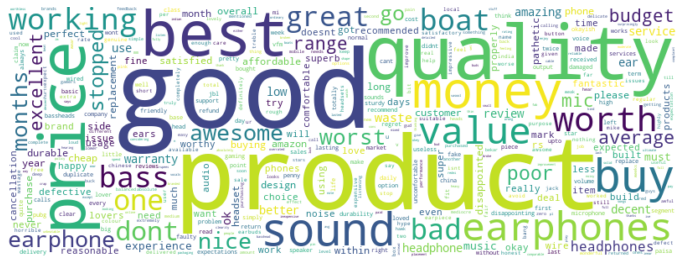

In [49]:
word_cloud(dataset, 'Review_title')

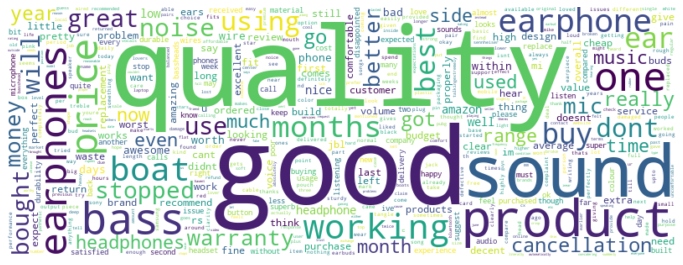

In [50]:
word_cloud(dataset, 'Review')

### 5.2 Analysis on Ratings

In [125]:
counts_in_percentage = (dataset.groupby(by='Ratings').count()/3640).round(2)*100
counts_in_percentage['Review_ID']

Ratings
1.0    21.0
2.0     8.0
3.0    12.0
4.0    23.0
5.0    36.0
Name: Review_ID, dtype: float64

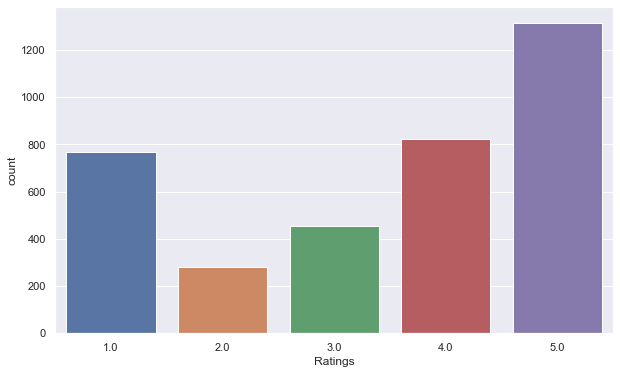

In [155]:
plt.figure(figsize=(10,6))
sns.countplot(dataset.Ratings)
plt.show()

* We can see that the majority of users is towards 5 star rating. But the 1 star rating also close 4 start rating counts.

* If we set threshold for satisfied and not satidfied customer as: 
        * rating >= 4 & 5 stars : POSITIVE REVIEW
        * rating <= 3, 2, 1 starts :NEGATIVE REVIEW
        
 ####  For above crieteria  POSITIVE STAR RATINGS :59% & NEGATIVE STAR RATINGS :41%

# PART 6: ANALYSIS ON RATING <=3 stars